<a href="https://colab.research.google.com/github/PJbourne/Data_Science_course/blob/main/Tasks_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark = SparkSession.builder.appName("ClassificacaoClientes").getOrCreate()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3231  100  3231    0     0  14892      0 --:--:-- --:--:-- --:--:-- 14889
+---+-----+------------+---------+---------------+
| id|idade|renda_mensal|categoria|comprou_produto|
+---+-----+------------+---------+---------------+
|  1|   42|        2192|        B|              0|
|  2|   20|        9495|        C|              0|
|  3|   38|        8424|        C|              0|
|  4|   49|        6228|        B|              1|
|  5|   26|        4657|        B|              1|
+---+-----+------------+---------+---------------+
only showing top 5 rows



In [ ]:
#Indexar coluna categórica
indexer = StringIndexer(inputCol="categoria", outputCol="categoria_index")
encoder = OneHotEncoder(inputCols=["categoria_index"], outputCols=["categoria_vec"])

# Montar vetor de features
assembler = VectorAssembler(
    inputCols=["idade", "renda_mensal", "categoria_vec"], outputCol="features"
)

# Modelo de regressão logística
lr = LogisticRegression(labelCol="comprou_produto", featuresCol="features")

# Pipeline completo
pipeline = Pipeline(stages=[indexer, encoder, assembler, lr])

# Divisão entre treino e teste
train, test = df.randomSplit([0.7, 0.3], seed=42)

# Treinamento do modelo
model = pipeline.fit(train)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext as sc

In [ ]:
from pyspark.sql import SparkSession

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [7]:
!curl -O https://raw.githubusercontent.com/farsilvar/data-mining-big-data-files/refs/heads/main/client_data.csv >> client_data.csv
df = spark.read.csv("client_data.csv", header = True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3231  100  3231    0     0  15492      0 --:--:-- --:--:-- --:--:-- 15533


In [15]:
df.show()

+---+-----+------------+---------+---------------+
| id|idade|renda_mensal|categoria|comprou_produto|
+---+-----+------------+---------+---------------+
|  1|   42|        2192|        B|              0|
|  2|   20|        9495|        C|              0|
|  3|   38|        8424|        C|              0|
|  4|   49|        6228|        B|              1|
|  5|   26|        4657|        B|              1|
|  6|   65|       13098|        B|              0|
|  7|   64|        3624|        C|              0|
|  8|   53|        6611|        A|              1|
|  9|   54|       14953|        B|              1|
| 10|   25|        5839|        A|              1|
| 11|   24|        5476|        C|              1|
| 12|   61|       10339|        C|              1|
| 13|   27|       10359|        C|              1|
| 14|   43|        7755|        A|              0|
| 15|   20|        3359|        A|              1|
| 16|   60|        8361|        A|              0|
| 17|   65|        5430|       

In [9]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- renda_mensal: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- comprou_produto: string (nullable = true)



In [11]:
from pyspark.sql.functions import col
df = df.withColumn("idade", col("idade").cast("int"))
df = df.withColumn("renda_mensal", col("renda_mensal").cast("int"))
df = df.withColumn("comprou_produto", col("comprou_produto").cast("int"))

ótimo. entendi. Bem, preciso utilizar validação cruzada para avaliar dois classificadores diferentes e relizar o teste do melhor modelo utilizando a métrica auc.

In [14]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- idade: integer (nullable = true)
 |-- renda_mensal: integer (nullable = true)
 |-- categoria: string (nullable = true)
 |-- comprou_produto: integer (nullable = true)



In [16]:
df = df.withColumnRenamed("comprou_produto", "label")

In [20]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [21]:
indexer = StringIndexer(inputCol="categoria", outputCol="categoria_indexed")

In [22]:
assembler = VectorAssembler(
    inputCols=["idade", "renda_mensal", "categoria_indexed"],
    outputCol="features"
)

In [24]:
df_indexed = indexer.fit(df).transform(df)

In [27]:
df_indexed.show()

+---+-----+------------+---------+-----+-----------------+
| id|idade|renda_mensal|categoria|label|categoria_indexed|
+---+-----+------------+---------+-----+-----------------+
|  1|   42|        2192|        B|    0|              1.0|
|  2|   20|        9495|        C|    0|              2.0|
|  3|   38|        8424|        C|    0|              2.0|
|  4|   49|        6228|        B|    1|              1.0|
|  5|   26|        4657|        B|    1|              1.0|
|  6|   65|       13098|        B|    0|              1.0|
|  7|   64|        3624|        C|    0|              2.0|
|  8|   53|        6611|        A|    1|              0.0|
|  9|   54|       14953|        B|    1|              1.0|
| 10|   25|        5839|        A|    1|              0.0|
| 11|   24|        5476|        C|    1|              2.0|
| 12|   61|       10339|        C|    1|              2.0|
| 13|   27|       10359|        C|    1|              2.0|
| 14|   43|        7755|        A|    0|              0.

In [25]:
df_final = assembler.transform(df_indexed).select("features", "label")

In [26]:
df_final.show()

+------------------+-----+
|          features|label|
+------------------+-----+
| [42.0,2192.0,1.0]|    0|
| [20.0,9495.0,2.0]|    0|
| [38.0,8424.0,2.0]|    0|
| [49.0,6228.0,1.0]|    1|
| [26.0,4657.0,1.0]|    1|
|[65.0,13098.0,1.0]|    0|
| [64.0,3624.0,2.0]|    0|
| [53.0,6611.0,0.0]|    1|
|[54.0,14953.0,1.0]|    1|
| [25.0,5839.0,0.0]|    1|
| [24.0,5476.0,2.0]|    1|
|[61.0,10339.0,2.0]|    1|
|[27.0,10359.0,2.0]|    1|
| [43.0,7755.0,0.0]|    0|
| [20.0,3359.0,0.0]|    1|
| [60.0,8361.0,0.0]|    0|
| [65.0,5430.0,1.0]|    1|
| [53.0,5695.0,2.0]|    1|
| [19.0,7977.0,0.0]|    0|
|[19.0,11666.0,2.0]|    1|
+------------------+-----+
only showing top 20 rows



In [28]:
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression

In [29]:
train_data, test_data = df_final.randomSplit([0.8, 0.2], seed=42)

In [30]:
LR = LogisticRegression(featuresCol="features", labelCol="label")
DT = DecisionTreeClassifier(featuresCol="features", labelCol="label")

In [32]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [33]:
lr_grid = ParamGridBuilder().addGrid(LR.regParam, [0.0, 0.1, 0.01]).build()
dt_grid = ParamGridBuilder().addGrid(DT.maxDepth, [2, 3, 5]).build()

In [34]:
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="label") #AreaUnderRoc = AUC "Area sobre a Curva ROC"

In [36]:
cv_lr = CrossValidator(estimator=LR,
                       estimatorParamMaps=lr_grid,
                       evaluator=evaluator,
                       numFolds=3)

cv_dt = CrossValidator(estimator=DT,
                       estimatorParamMaps=dt_grid,
                       evaluator=evaluator,
                       numFolds=3)

In [37]:
model_lr = cv_lr.fit(train_data)
model_dt = cv_dt.fit(train_data)

In [38]:
pred_lr = model_lr.transform(test_data)
pred_dt = model_dt.transform(test_data)

In [39]:
auc_lr = evaluator.evaluate(pred_lr)
auc_dt = evaluator.evaluate(pred_dt)

In [40]:
print(f"AUC - LR: {auc_lr:.4f}")
print(f"AUC - DT: {auc_dt:.4f}")

AUC - LR: 0.6581
AUC - DT: 0.6795


In [41]:
predictions = model_dt.transform(test_data)

### Trechos a seguir são puramente gerados por IA

In [44]:
# A curva ROC fica disponível apenas para certos classificadores como LogisticRegression
if hasattr(model_dt.bestModel, "summary"):
    training_summary = model_dt.bestModel.summary

    # DataFrame com a curva ROC
    roc = training_summary.roc
    roc.show()

    print(f"AUC = {training_summary.areaUnderROC}")
else:
    print("⚠️ O modelo selecionado não suporta .summary (ex: DecisionTree não tem ROC diretamente).")


⚠️ O modelo selecionado não suporta .summary (ex: DecisionTree não tem ROC diretamente).


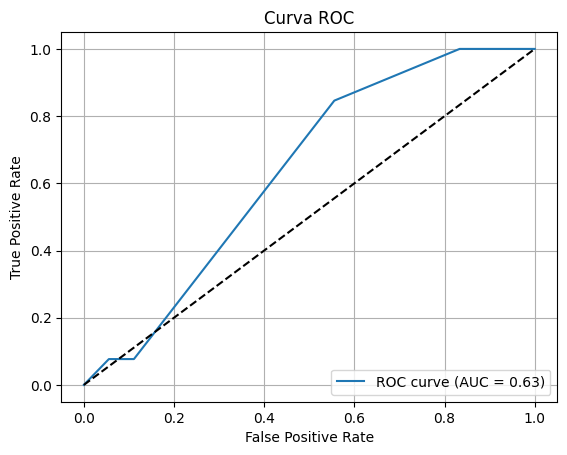

In [45]:
# Extrair probabilidades e rótulos verdadeiros
probs_labels = predictions.select("probability", "label").rdd.map(lambda row: (float(row.probability[1]), row.label))

# Converter para Pandas para visualizar fora do Spark (exemplo visual com matplotlib, opcional)
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = probs_labels.collect()
y_scores, y_true = zip(*data)

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()